# 实验二：回归模型
- 姓名：徐文斌
- 学号：2010234
- 专业：计算机科学与技术

### 实验要求

- 回归是监督学习的一个重要问题，回归用于预测**输入变量**和**输出变量**之间的关系，特别是当输入变量的值发生变化时，输出变量的值也随之发生变化。
- 回归模型是一种表示从输入变量到输出变量之间映射的函数
- 对连续值的预测
- 可以用合适的曲线揭示样本点随着自变量的变化关系

#### 基本要求
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
1. 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
2. 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

#### 中级要求
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。

#### 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

### 导入需要的包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

### winequality-white数据集

In [2]:
data = pd.read_csv("winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### 对数据集进行预处理

#### 使用中心化对数据进行预处理

In [3]:
def normalization_fun(x):
    # 特征零均值
    x = (x - np.mean(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x

In [4]:
X = data.iloc[:, 0:-1]
data.iloc[:, 0:-1] = normalization_fun(X)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.013963,-0.008080,0.015547,0.219457,-0.002292,0.033770,0.073409,0.134425,-0.171151,-0.046334,-0.276495,6
1,-0.053345,0.021332,0.003499,-0.073488,0.009578,-0.074244,-0.014758,-0.000528,0.101576,0.000178,-0.163591,6
2,0.119732,0.001724,0.039644,0.007800,0.012545,-0.018495,-0.095964,0.020679,0.065212,-0.057961,-0.066817,6
3,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075,6
4,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.062960,-0.066903,-0.026621,-0.073488,-0.020096,-0.039401,-0.107565,-0.055666,0.074303,0.011806,0.110602,6
4894,-0.024499,0.040940,0.015547,0.024672,0.003643,0.075582,0.068769,0.016823,-0.034788,-0.034706,-0.147462,5
4895,-0.034114,-0.037491,-0.086862,-0.079623,-0.014161,-0.018495,-0.063482,-0.028675,-0.180242,-0.034706,-0.179720,6
4896,-0.130268,0.011528,-0.020597,-0.081157,-0.070541,-0.053338,-0.065802,-0.102899,0.137939,-0.127729,0.368667,7


#### 使用分层采样对数据进行4：1划分处理

In [5]:
train_rate = 0.8 # 划分比例
train_data = data.groupby('quality').apply(lambda group : group.sample(frac=train_rate)) # 分层抽样得到训练集数据
train_data.index = train_data.index.droplevel()
test_data = data[~data.index.isin(train_data.index)] # 得到测试集数据
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
# 对分层抽样的结果进行展示
print("分层抽样结果：")
print("训练集数据各组实例个数：")
print(train_data.groupby('quality').apply(lambda group : group)['quality'].value_counts()) # 输出训练集各组实例个数
print("测试集数据各组实例个数：")
print(test_data.groupby('quality').apply(lambda group : group)['quality'].value_counts()) # 输出数据集各组实例个数

分层抽样结果：
训练集数据各组实例个数：
6    1758
5    1166
7     704
8     140
4     130
3      16
9       4
Name: quality, dtype: int64
测试集数据各组实例个数：
6    440
5    291
7    176
8     35
4     33
3      4
9      1
Name: quality, dtype: int64


#### 提取数据特征和标签，在train_X和test_X左侧添加一全为1的列，并将数据转为numpy.ndarray类型（这样比较好操作）

In [6]:
# 提取数据特征和标签
train_X = train_data.iloc[:, 0:-1]
train_Y = train_data.iloc[:, -1]

test_X = test_data.iloc[:, 0:-1]
test_Y = test_data.iloc[:, -1]
# 在训练集和测试集左侧添加全为1的列
train_X = pd.concat([pd.DataFrame(np.ones(train_X.shape[0]), columns=['x0']), train_X], axis=1)
test_X = pd.concat([pd.DataFrame(np.ones(test_X.shape[0]), columns=['x0']), test_X], axis=1)
# 将数据转换为numpy.ndarray格式
train_X = np.array(train_X)
train_Y = np.array(train_Y)
train_Y = train_Y.reshape(-1, 1)
test_X = np.array(test_X)
test_Y = np.array(test_Y)
test_Y = test_Y.reshape(-1, 1)
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((3918, 12), (3918, 1), (980, 12), (980, 1))

#### 初始化回归系数

In [7]:
W_init = np.random.randn(train_X.shape[1], 1)
W_init

array([[ 0.0845508 ],
       [-1.20407785],
       [-0.29171098],
       [ 0.91485112],
       [ 0.30994257],
       [-0.35320227],
       [-0.77421499],
       [-2.14901887],
       [ 1.04387887],
       [ 0.33876328],
       [-0.63511644],
       [ 0.0227964 ]])

### 基本要求

#### MSE均方误差计算函数

In [8]:
def MSE(X, Y, W):
    return np.sum(np.power((np.dot(X, W) - Y), 2)) / Y.size

#### 批量梯度下降BGD

In [9]:
def BGD(train_X, train_Y, test_X, test_Y, W, alpha, k):
    W = copy.deepcopy(W)
    w_size = W.size
    MSE_train = np.zeros(k + 1)
    MSE_test = np.zeros(k + 1)
    # 得到未学习时的MSE
    MSE_train[0] = MSE(train_X, train_Y, W)
    MSE_test[0] = MSE(test_X, test_Y, W)
    for i in range(k):
        for j in range(w_size):
            Xj = train_X[:, j].reshape(-1, 1)
            W[j] = W[j] + alpha * np.sum((train_Y - np.dot(train_X, W)) * Xj) / train_Y.size
        MSE_train[i + 1] = MSE(train_X, train_Y, W)
        MSE_test[i + 1] = MSE(test_X, test_Y, W)
    return W, MSE_train, MSE_test

#### 随机梯度下降SGD

In [10]:
def SGD(train_X, train_Y, test_X, test_Y, W, alpha, k):
    train_X = copy.deepcopy(train_X)
    W = copy.deepcopy(W)
    w_size = W.size
    MSE_train = np.zeros(k + 1)
    MSE_test = np.zeros(k + 1)
    MSE_train[0] = MSE(train_X, train_Y, W)
    MSE_test[0] = MSE(test_X, test_Y, W)
    for i in range(k):
        np.random.shuffle(train_X)
        for k in range(train_Y.size):
            Y_i = train_Y[k, :].reshape(-1, 1)
            X_i = train_X[k, :].reshape(1, -1)
            for j in range(w_size):
                Xj = train_X[i, j].reshape(-1, 1)
                W[j] = W[j] + alpha * np.sum((Y_i - np.dot(X_i, W)) * Xj)
        MSE_train[i + 1] = MSE(train_X,train_Y, W)
        MSE_test[i + 1] = MSE(test_X, test_Y, W)
    return W, MSE_train, MSE_test

#### BGD与SGD比较

In [11]:
alpha = 0.1
k = 50
BW_final, BMSE_train, BMSE_test = BGD(train_X, train_Y, test_X, test_Y, W_init, alpha, k)
SW_final, SMSE_train, SMSE_test = SGD(train_X, train_Y, test_X, test_Y, W_init, alpha, k)
print(f"批量梯度下降法以{alpha}学习率经{k}轮学习，最终得到的回归系数为：\n{BW_final}")
print(f"未学习以及每轮学习过后训练集均方误差为：\n{BMSE_train}\n测试集均方误差为：\n{BMSE_test}")
print(f"随机梯度下降法以{alpha}学习率经{k}轮学习，最终得到的回归系数为：\n{SW_final}")
print(f"未学习以及每轮学习过后训练集均方误差为：\n{SMSE_train}\n测试集均方误差为：\n{SMSE_test}")

批量梯度下降法以0.1学习率经50轮学习，最终得到的回归系数为：
[[ 5.85016161]
 [-1.20179438]
 [-0.35184457]
 [ 0.91071382]
 [ 0.29821929]
 [-0.39039775]
 [-0.72448817]
 [-2.10958793]
 [ 0.99783679]
 [ 0.35636606]
 [-0.53292818]
 [ 0.30294255]]
未学习以及每轮学习过后训练集均方误差为：
[34.37261658 27.99032986 22.82050196 18.63276672 15.24052757 12.49264133
 10.26668204  8.4634847   7.00272567  5.81934279  4.86063574  4.08391726
  3.45461063  2.94470876  2.53152585  2.19668644  1.92530638  1.70532949
  1.52699028  1.38237868  1.26508753  1.16992703  1.09269341  1.02998164
  0.97903361  0.93761526  0.90391697  0.87647296  0.85409594  0.83582419
  0.8208787   0.80862847  0.79856238  0.79026643  0.78340525  0.77770719
  0.7729522   0.76896205  0.76559235  0.76272613  0.76026865  0.75814315
  0.75628747  0.75465122  0.75319361  0.75188156  0.7506883   0.74959211
  0.7485754   0.74762393  0.74672613]
测试集均方误差为：
[34.2580054  27.8872558  22.72782774 18.54946829 15.16568278 12.42541963
 10.20633533  8.40933906  6.95417397  5.77583802  4.82168501

#### 绘制BGD和SGD的MSE收敛曲线

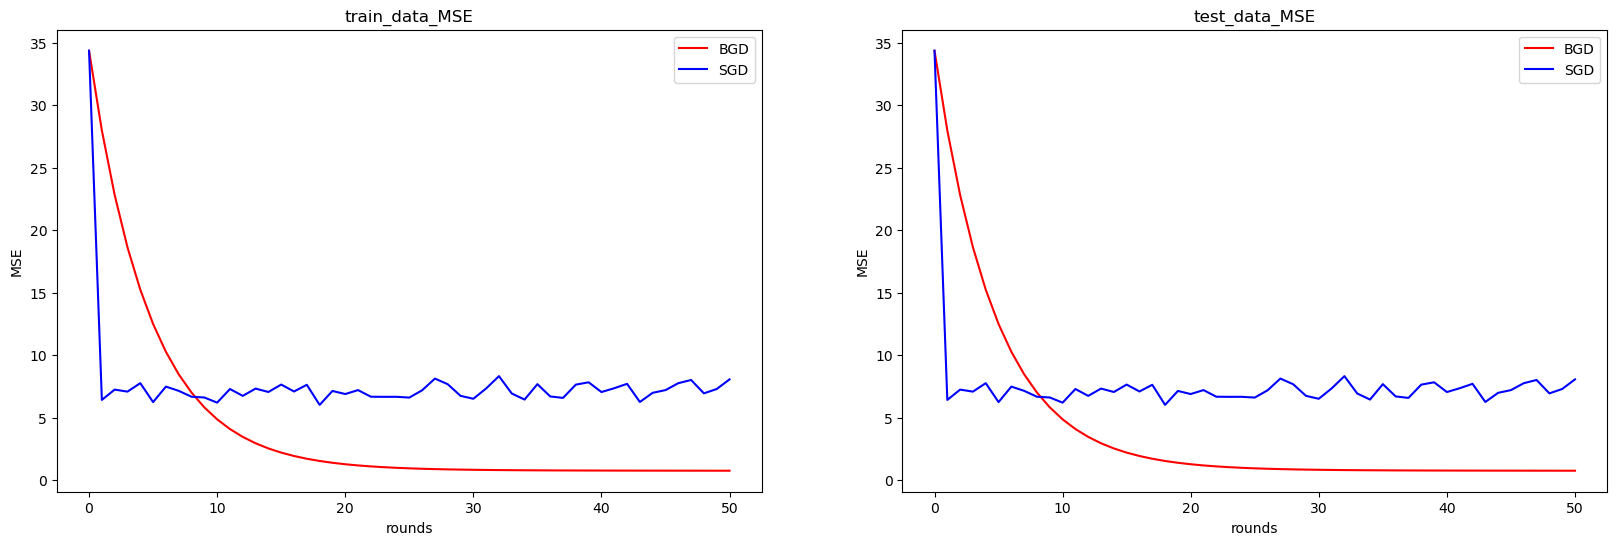

In [12]:
plt.figure(figsize=(20, 6), dpi=100)
plt.subplot(1, 2, 1)
plt.xlabel("rounds")
plt.ylabel("MSE")
plt.title("train_data_MSE")
plt.plot(range(k + 1), BMSE_train, 'r')
plt.plot(range(k + 1), SMSE_train, 'b')
plt.legend(['BGD','SGD'],loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("rounds")
plt.ylabel("MSE")
plt.title("test_data_MSE")
plt.plot(range(k + 1), BMSE_train, 'r')
plt.plot(range(k + 1), SMSE_train, 'b')
plt.legend(['BGD','SGD'],loc='upper right')
plt.show()

如上图所示，可以看到，随机梯度下降相比于批量梯度下降来说，其收敛速度更快。但是，当误差稳定后，随机梯度下降的误差要大于批量梯度下降的误差。

#### BGD和SGD不同学习率MSE曲线
我们固定学习轮数为30轮。对于BGD，我们取学习率分别为2、1.5、1、0.1、0.01、0.001进行测试；对于SGD，我们取学习率分别为1.2、1、0.1、0.01、0.001。

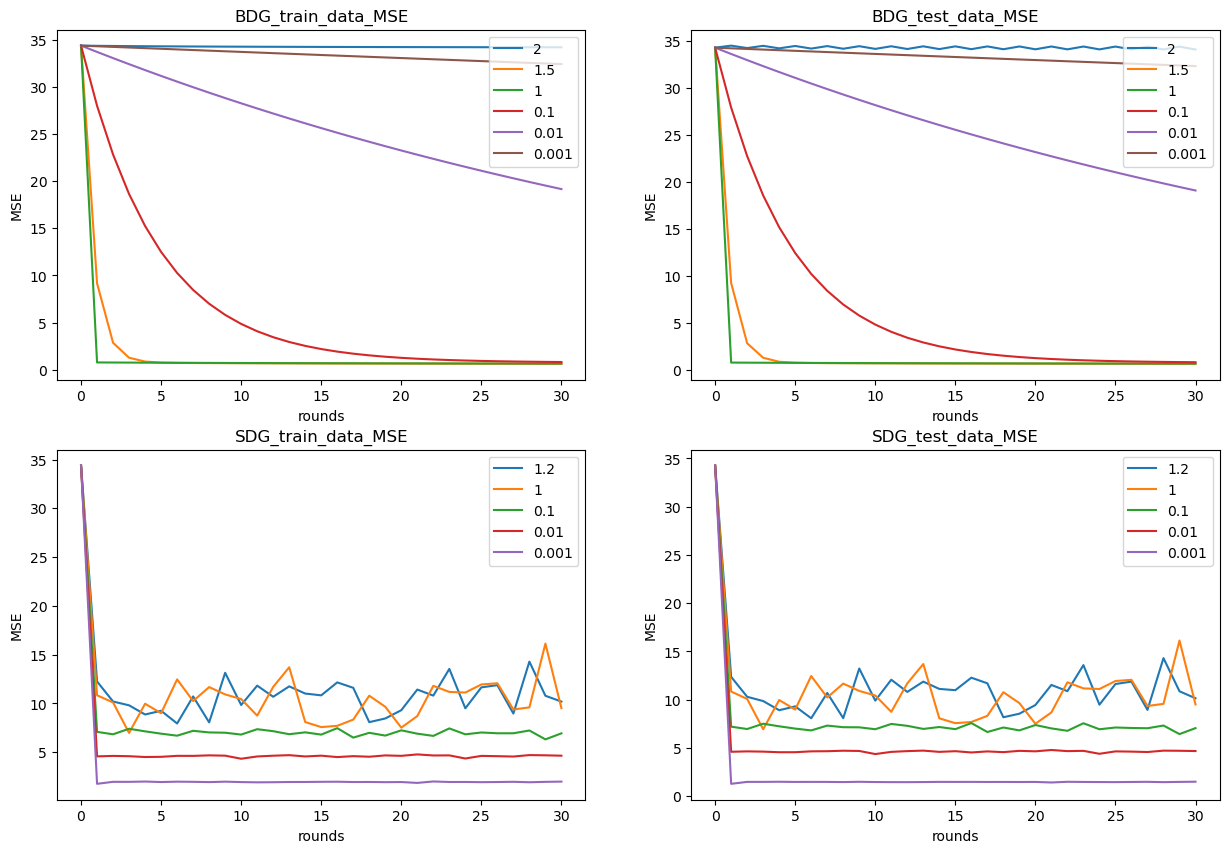

In [13]:
k = 30
alphas1 = [2, 1.5, 1, 0.1, 0.01, 0.001]
alphas2 = [1.2, 1, 0.1, 0.01, 0.001]
BMSES_train = list()
BMSES_test = list()
SMSES_train = list()
SMSES_test = list()
for alpha in alphas1:
    BW_final, BMSE_train, BMSE_test = BGD(train_X, train_Y, test_X, test_Y, W_init, alpha, k)
    BMSES_train.append(BMSE_train)
    BMSES_test.append(BMSE_test)
for alpha in alphas2:
    SW_final, SMSE_train, SMSE_test = SGD(train_X, train_Y, test_X, test_Y, W_init, alpha, k)
    SMSES_train.append(SMSE_train)
    SMSES_test.append(SMSE_test)
plt.figure(figsize=(15, 10), dpi=100)
# BGD_train_MSE
plt.subplot(2, 2, 1)
plt.xlabel("rounds")
plt.ylabel("MSE")
plt.title("BDG_train_data_MSE")
for i in range(len(alphas1)):
    plt.plot(range(k + 1), BMSES_train[i])
plt.legend(alphas1,loc='upper right')
# BGD_test_MSE
plt.subplot(2, 2, 2)
plt.xlabel("rounds")
plt.ylabel("MSE")
plt.title("BDG_test_data_MSE")
for i in range(len(alphas1)):
    plt.plot(range(k + 1), BMSES_test[i])
plt.legend(alphas1,loc='upper right')
# SGD_train_MSE
plt.subplot(2, 2, 3)
plt.xlabel("rounds")
plt.ylabel("MSE")
plt.title("SDG_train_data_MSE")
for i in range(len(alphas2)):
    plt.plot(range(k + 1), SMSES_train[i])
plt.legend(alphas2,loc='upper right')
# SGD_test_MSE
plt.subplot(2, 2, 4)
plt.xlabel("rounds")
plt.ylabel("MSE")
plt.title("SDG_test_data_MSE")
for i in range(len(alphas2)):
    plt.plot(range(k + 1), SMSES_test[i])
plt.legend(alphas2,loc='upper right')
plt.show()

不同学习率的MSE曲线如上图所示。

对于BGD，当学习率较大时，比如2，模型无法收敛；减小学习率，学习率为1.5时，收敛效果较好；继续减小学习率，可以看到，学习率为1时，达到了测试数据中的最好的收敛效果。而当学习率过于小时，如0.01和0.001，模型虽然还在收敛，但是收敛速度比较缓慢。 这就提示我们选择的学习率不能过大也不能过小，如果学习率过大，会导致模型不收敛；学习率过小，会导致模型收敛速度过慢。在所有测试的学习率中，BGD的最佳学习率为1。

对于SGD，当学习率较大时，比如1.2，模型的收敛结果是很不稳定的，波动性很大；可以看到模型的收敛效果随着学习率的减少而改善。在所有测试的学习率中，SGD的最佳学习率为0.001。

### 中级要求
回归模型在机器学习和统计学上的差异

在机器学习中，我们需要“训练”模型，使用数据的一个子集对模型进行训练，通过在测试集上对模型进行测试来对模型预测能力的好坏进行评估。机器学习的最终目的是在测试集上获得最佳性能。

在统计学中，我们则事先假设数据是一个具有高斯噪声的线性回归量，然后试图找到一条线，最大限度地减少了所有数据的均方误差。不需要训练或测试集，在许多情况下，建模的目的是描述数据与输出变量之间的关系, 而不是对未来数据进行预测。我们称此过程为统计推断，而不是预测。尽管我们可以使用此模型进行预测，但评估模型的方法不再是测试集，而是评估模型参数的显著性和健壮性。

机器学习的目的是获得一个可反复预测的模型。我们通常不关心模型是否可以解释。机器学习只在乎结果。而统计建模更多的是为了寻找变量之间的关系和确定关系的显著性，恰巧迎合了预测。

### 高级要求

#### 岭回归实现

In [14]:
def RidgeRegression(train_X, train_Y, lam=0.2):  # 设置岭系数为0.2
    xMat = np.mat(train_X)
    yMat = np.mat(train_Y)

    xTx = xMat.T * xMat
    rxTx = xTx + np.eye(xMat.shape[1]) * lam
    # 计算矩阵的值,如果值为0，说明该矩阵没有逆矩阵
    if np.linalg.det(rxTx) == 0.0:
        print("This matrix cannot do inverse")
        return
    ws = rxTx.I * xMat.T * yMat
    return ws

In [15]:
ws = RidgeRegression(train_X, train_Y)
print(f"岭回归得到的回归系数为:\n{ws}")
train_MSE = MSE(train_X, train_Y, ws)
test_MSE = MSE(test_X, test_Y, ws)
print(f"平均训练误差为:{train_MSE}")
print(f"平均测试误差为:{test_MSE}")

岭回归得到的回归系数为:
[[ 5.88002225]
 [ 0.11243923]
 [-1.91746252]
 [ 0.04729959]
 [ 3.69283488]
 [-0.17194484]
 [ 1.07693539]
 [-0.23382408]
 [-4.21865894]
 [ 0.46992462]
 [ 0.57830754]
 [ 1.6811353 ]]
平均训练误差为:0.5609922537717323
平均测试误差为:0.5809151365860425
